# Ejercicio 1

Implementar los siguientes métodos de descenso gradiente (naïve = tamaño de paso α constante):

- descenso gradiente naïve con dirección de descenso aleatoria  
- descenso máximo naïve  
- descenso grediente de Newton, con Hessiano exacto  
- un método de gradiente conjugado (Fletcher-Reeves, Hestenes-Stiefel, Polak-Ribière)  
- el método BFGS.  

En cada uno de los métodos, su función debe recibir los siguientes argumentos:  
 la función objetivo f,  
 el gradiente de la función objetivo df,  
 el hessiano ddf (cuando sea necesario),  
 un punto inicial x0 ∈ ℝⁿ,  
 el tamaño de paso α > 0,  
 el número máximo de iteraciones maxIter,  
 la tolerancia ε, así como un criterio de paro.  

Como resultado, sus algoritmos deben devolver:  
- la mejor solución encontrada `best` (la última de las aproximaciones calculadas),  
- la secuencia de iteraciones `xk`,  
- la secuencia de valores `f(xk)`,  
- la secuencia de errores en cada paso (según el error de su criterio de paro).  

Además, es deseable indicar:  
- el número de iteraciones efectuadas por el algoritmo,  
- si se obtuvo o no convergencia del método.  

In [ ]:
# libs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
def descenso_gradiente_naive(f, df, x0, alpha=0.01, max_iter=1000, tol=1e-6):
    """
    Implementación simple del descenso gradiente con paso fijo (α constante).

    Args:
        f (función): Función objetivo a minimizar.
        df (función): Gradiente de la función.
        x0 (array): Punto inicial.
        alpha (float): Tamaño del paso (learning rate).
        max_iter (int): Máximo número de iteraciones.
        tol (float): Tolerancia para detenerse (si el cambio en f(x) es muy pequeño).

    Returns:
        mejor_x (array): Mejor solución encontrada.
        historial_x (list): Lista de todas las posiciones x visitadas.
        historial_f (list): Lista de valores f(x) en cada paso.
        convergio (bool): True si el método convergió antes de max_iter.
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        gradiente = df(x_actual)
        x_nuevo = x_actual - alpha * gradiente

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(x_nuevo - x_actual) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [36]:
def descenso_gradiente_aleatorio(f, x0, alpha=0.01, max_iter=1000, tol=1e-6):
    """
    Descenso gradiente con dirección aleatoria (no usa el gradiente real).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        direccion_aleatoria = np.random.randn(*x0.shape)
        direccion_aleatoria = direccion_aleatoria / np.linalg.norm(direccion_aleatoria)

        x_nuevo = x_actual - alpha * direccion_aleatoria

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(x_nuevo - x_actual) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [37]:
def descenso_maximo_naive(f, df, x0, alpha=0.01, max_iter=1000, tol=1e-6):
    """
    Descenso máximo (usa el gradiente real, pero con paso fijo).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        gradiente = df(x_actual)
        x_nuevo = x_actual - alpha * gradiente

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [38]:
def newton(f, df, ddf, x0, max_iter=1000, tol=1e-6):
    """
    Método de Newton (usa el Hessiano para ajustar el paso).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    for iteracion in range(max_iter):
        gradiente = df(x_actual)
        hessiano = ddf(x_actual)

        paso = np.linalg.solve(hessiano, -gradiente)
        x_nuevo = x_actual + paso

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente) < tol:
            convergio = True
            break

        x_actual = x_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [39]:
def gradiente_conjugado_fletcher_reeves(f, df, x0, max_iter=1000, tol=1e-6):
    """
    Gradiente conjugado (Fletcher-Reeves).
    """
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    gradiente_actual = df(x_actual)
    direccion = -gradiente_actual

    for iteracion in range(max_iter):
        alpha = 0.01
        x_nuevo = x_actual + alpha * direccion

        gradiente_nuevo = df(x_nuevo)

        beta = np.dot(gradiente_nuevo, gradiente_nuevo) / np.dot(gradiente_actual, gradiente_actual)
        direccion = -gradiente_nuevo + beta * direccion

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente_nuevo) < tol:
            convergio = True
            break

        x_actual = x_nuevo
        gradiente_actual = gradiente_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

In [40]:
def bfgs(f, df, x0, max_iter=1000, tol=1e-6):
    """
    Método BFGS (aproxima el Hessiano usando diferencias de gradientes).
    """
    n = len(x0)
    H = np.eye(n)
    x_actual = x0.copy()
    historial_x = [x_actual.copy()]
    historial_f = [f(x_actual)]
    convergio = False

    gradiente_actual = df(x_actual)

    for iteracion in range(max_iter):
        paso = -H @ gradiente_actual

        alpha = 0.01
        x_nuevo = x_actual + alpha * paso

        gradiente_nuevo = df(x_nuevo)

        s = x_nuevo - x_actual
        y = gradiente_nuevo - gradiente_actual

        rho = 1.0 / (y.T @ s)
        H = (np.eye(n) - rho * np.outer(s, y)) @ H @ (np.eye(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)

        historial_x.append(x_nuevo.copy())
        historial_f.append(f(x_nuevo))

        if np.linalg.norm(gradiente_nuevo) < tol:
            convergio = True
            break

        x_actual = x_nuevo
        gradiente_actual = gradiente_nuevo

    mejor_x = x_actual
    return mejor_x, historial_x, historial_f, convergio

# Ejercicio 2

Testar sus algoritmos del Ejercicio 1 con las siguientes funciones:

a) La función dada por  

$$
f(x, y) = x^4 + y^4 - 4xy + \frac{1}{2}y + 1
$$

Punto inicial:  

$$
\mathbf{x}_0 = (-3, 1, -3, 1)^T
$$  

Óptimo:  

$$
\mathbf{x}^* = (-1.01463, -1.04453)^T, \quad f(\mathbf{x}^*) = -1.51132
$$


In [ ]:
# Definir la función a) f(x,y) = x^4 + y^4 - 4xy + (1/2)y + 1
def f_a(x):
    """Función objetivo a minimizar"""
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

def df_a(x):
    """Gradiente de f(x,y)"""
    df_dx = 4*x[0]**3 - 4*x[1]
    df_dy = 4*x[1]**3 - 4*x[0] + 0.5
    return np.array([df_dx, df_dy])

def ddf_a(x):
    """Hessiano de f(x,y)"""
    d2f_dx2 = 12*x[0]**2
    d2f_dy2 = 12*x[1]**2
    d2f_dxdy = -4
    return np.array([[d2f_dx2, d2f_dxdy], 
                     [d2f_dxdy, d2f_dy2]])

# Punto inicial y solución óptima conocida
x0 = np.array([-3.0, 1.0])
x_optimo = np.array([-1.01463, -1.04453])
f_optimo = -1.51132

print("="*70)
print("TESTING ALGORITMOS DE OPTIMIZACIÓN - FUNCIÓN A")
print("="*70)
print(f"Función: f(x,y) = x⁴ + y⁴ - 4xy + 0.5y + 1")
print(f"Punto inicial: x₀ = {x0}")
print(f"Óptimo conocido: x* = {x_optimo}, f(x*) = {f_optimo:.5f}")
print("="*70)

# Parámetros para los algoritmos
alpha = 0.01  # Tamaño de paso inicial
max_iter = 500
tol = 1e-6

# Ejecutar todos los algoritmos
resultados = {}

print("\nEJECUTANDO ALGORITMOS...")
print("-"*40)

# 1. Descenso gradiente naïve
print("1. Descenso gradiente naïve...")
try:
    best_1, hist_x_1, hist_f_1, conv_1 = descenso_gradiente_naive(f_a, df_a, x0, alpha, max_iter, tol)
    error_1 = np.linalg.norm(best_1 - x_optimo)
    resultados['Descenso gradiente'] = {
        'convergencia': conv_1,
        'iteraciones': len(hist_x_1) - 1,
        'solucion': best_1,
        'error': error_1,
        'historial_x': hist_x_1,
        'historial_f': hist_f_1
    }
    print(f"   ✓ Completado: {len(hist_x_1)-1} iteraciones, error: {error_1:.6f}")
except Exception as e:
    print(f"   ✗ Error: {e}")
    resultados['Descenso gradiente'] = None

# 2. Descenso gradiente aleatorio
print("2. Descenso gradiente aleatorio...")
try:
    np.random.seed(42)  # Para reproducibilidad
    best_2, hist_x_2, hist_f_2, conv_2 = descenso_gradiente_aleatorio(f_a, x0, alpha*10, max_iter*2, tol)
    error_2 = np.linalg.norm(best_2 - x_optimo)
    resultados['Descenso aleatorio'] = {
        'convergencia': conv_2,
        'iteraciones': len(hist_x_2) - 1,
        'solucion': best_2,
        'error': error_2,
        'historial_x': hist_x_2,
        'historial_f': hist_f_2
    }
    print(f" Completado: {len(hist_x_2)-1} iteraciones, error: {error_2:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['Descenso aleatorio'] = None

# 3. Descenso máximo naïve
print("3. Descenso máximo naïve...")
try:
    best_3, hist_x_3, hist_f_3, conv_3 = descenso_maximo_naive(f_a, df_a, x0, alpha, max_iter, tol)
    error_3 = np.linalg.norm(best_3 - x_optimo)
    resultados['Descenso máximo'] = {
        'convergencia': conv_3,
        'iteraciones': len(hist_x_3) - 1,
        'solucion': best_3,
        'error': error_3,
        'historial_x': hist_x_3,
        'historial_f': hist_f_3
    }
    print(f" Completado: {len(hist_x_3)-1} iteraciones, error: {error_3:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['Descenso máximo'] = None

# 4. Método de Newton
print("4. Método de Newton...")
try:
    best_4, hist_x_4, hist_f_4, conv_4 = newton(f_a, df_a, ddf_a, x0, max_iter, tol)
    error_4 = np.linalg.norm(best_4 - x_optimo)
    resultados['Newton'] = {
        'convergencia': conv_4,
        'iteraciones': len(hist_x_4) - 1,
        'solucion': best_4,
        'error': error_4,
        'historial_x': hist_x_4,
        'historial_f': hist_f_4
    }
    print(f"  Completado: {len(hist_x_4)-1} iteraciones, error: {error_4:.6f}")
except Exception as e:
    print(f"   ✗ Error: {e}")
    resultados['Newton'] = None

# 5. Fletcher-Reeves
print("5. Fletcher-Reeves...")
try:
    best_5, hist_x_5, hist_f_5, conv_5 = gradiente_conjugado_fletcher_reeves(f_a, df_a, x0, max_iter, tol)
    error_5 = np.linalg.norm(best_5 - x_optimo)
    resultados['Fletcher-Reeves'] = {
        'convergencia': conv_5,
        'iteraciones': len(hist_x_5) - 1,
        'solucion': best_5,
        'error': error_5,
        'historial_x': hist_x_5,
        'historial_f': hist_f_5
    }
    print(f" Completado: {len(hist_x_5)-1} iteraciones, error: {error_5:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['Fletcher-Reeves'] = None

# 6. BFGS
print("6. BFGS...")
try:
    best_6, hist_x_6, hist_f_6, conv_6 = bfgs(f_a, df_a, x0, max_iter, tol)
    error_6 = np.linalg.norm(best_6 - x_optimo)
    resultados['BFGS'] = {
        'convergencia': conv_6,
        'iteraciones': len(hist_x_6) - 1,
        'solucion': best_6,
        'error': error_6,
        'historial_x': hist_x_6,
        'historial_f': hist_f_6
    }
    print(f" Completado: {len(hist_x_6)-1} iteraciones, error: {error_6:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados['BFGS'] = None

print("\n" + "="*70)
print("TABLA COMPARATIVA DE RESULTADOS")
print("="*70)

# Crear tabla comparativa
tabla_data = []
for nombre, datos in resultados.items():
    if datos is not None:
        tabla_data.append([
            nombre,
            "Sí" if datos['convergencia'] else "No",
            datos['iteraciones'],
            f"({datos['solucion'][0]:.5f}, {datos['solucion'][1]:.5f})",
            f"{datos['error']:.6f}"
        ])
    else:
        tabla_data.append([nombre, "Error", "-", "-", "-"])

# Crear DataFrame para mejor presentación
df_resultados = pd.DataFrame(tabla_data, 
                           columns=['Algoritmo', 'Convergencia', 'Iteraciones', 'Solución', 'Error'])

print(df_resultados.to_string(index=False))

print(f"\n* Error calculado como ||x_encontrado - x_óptimo||₂")
print(f"* x_óptimo = {x_optimo}")
print(f"* f(x_óptimo) = {f_optimo:.5f}")

TESTING ALGORITMOS DE OPTIMIZACIÓN - FUNCIÓN A
Función: f(x,y) = x⁴ + y⁴ - 4xy + 0.5y + 1
Punto inicial: x₀ = [-3.  1.]
Óptimo conocido: x* = [-1.01463 -1.04453], f(x*) = -1.51132

EJECUTANDO ALGORITMOS...
----------------------------------------
1. Descenso gradiente naïve...
   ✓ Completado: 166 iteraciones, error: 0.000012
2. Descenso gradiente aleatorio...
 Completado: 1000 iteraciones, error: 4.242351
3. Descenso máximo naïve...
 Completado: 217 iteraciones, error: 0.000002
4. Método de Newton...
  Completado: 19 iteraciones, error: 2.823188
5. Fletcher-Reeves...
 Completado: 500 iteraciones, error: nan
6. BFGS...
 Completado: 500 iteraciones, error: 89.413667

TABLA COMPARATIVA DE RESULTADOS
         Algoritmo Convergencia  Iteraciones              Solución     Error
Descenso gradiente           Sí          166  (-1.01462, -1.04452)  0.000012
Descenso aleatorio           No         1000  (-5.23334, -1.49176)  4.242351
   Descenso máximo           Sí          217  (-1.01463, -1.04

C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2947865838.py:11: RuntimeWarning: overflow encountered in scalar power
  df_dx = 4*x[0]**3 - 4*x[1]
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2947865838.py:12: RuntimeWarning: overflow encountered in scalar power
  df_dy = 4*x[1]**3 - 4*x[0] + 0.5
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2548758238.py:20: RuntimeWarning: invalid value encountered in add
  direccion = -gradiente_nuevo + beta * direccion
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2947865838.py:7: RuntimeWarning: overflow encountered in scalar power
  return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1



VISUALIZACIÓN DE TRAYECTORIAS DE CONVERGENCIA


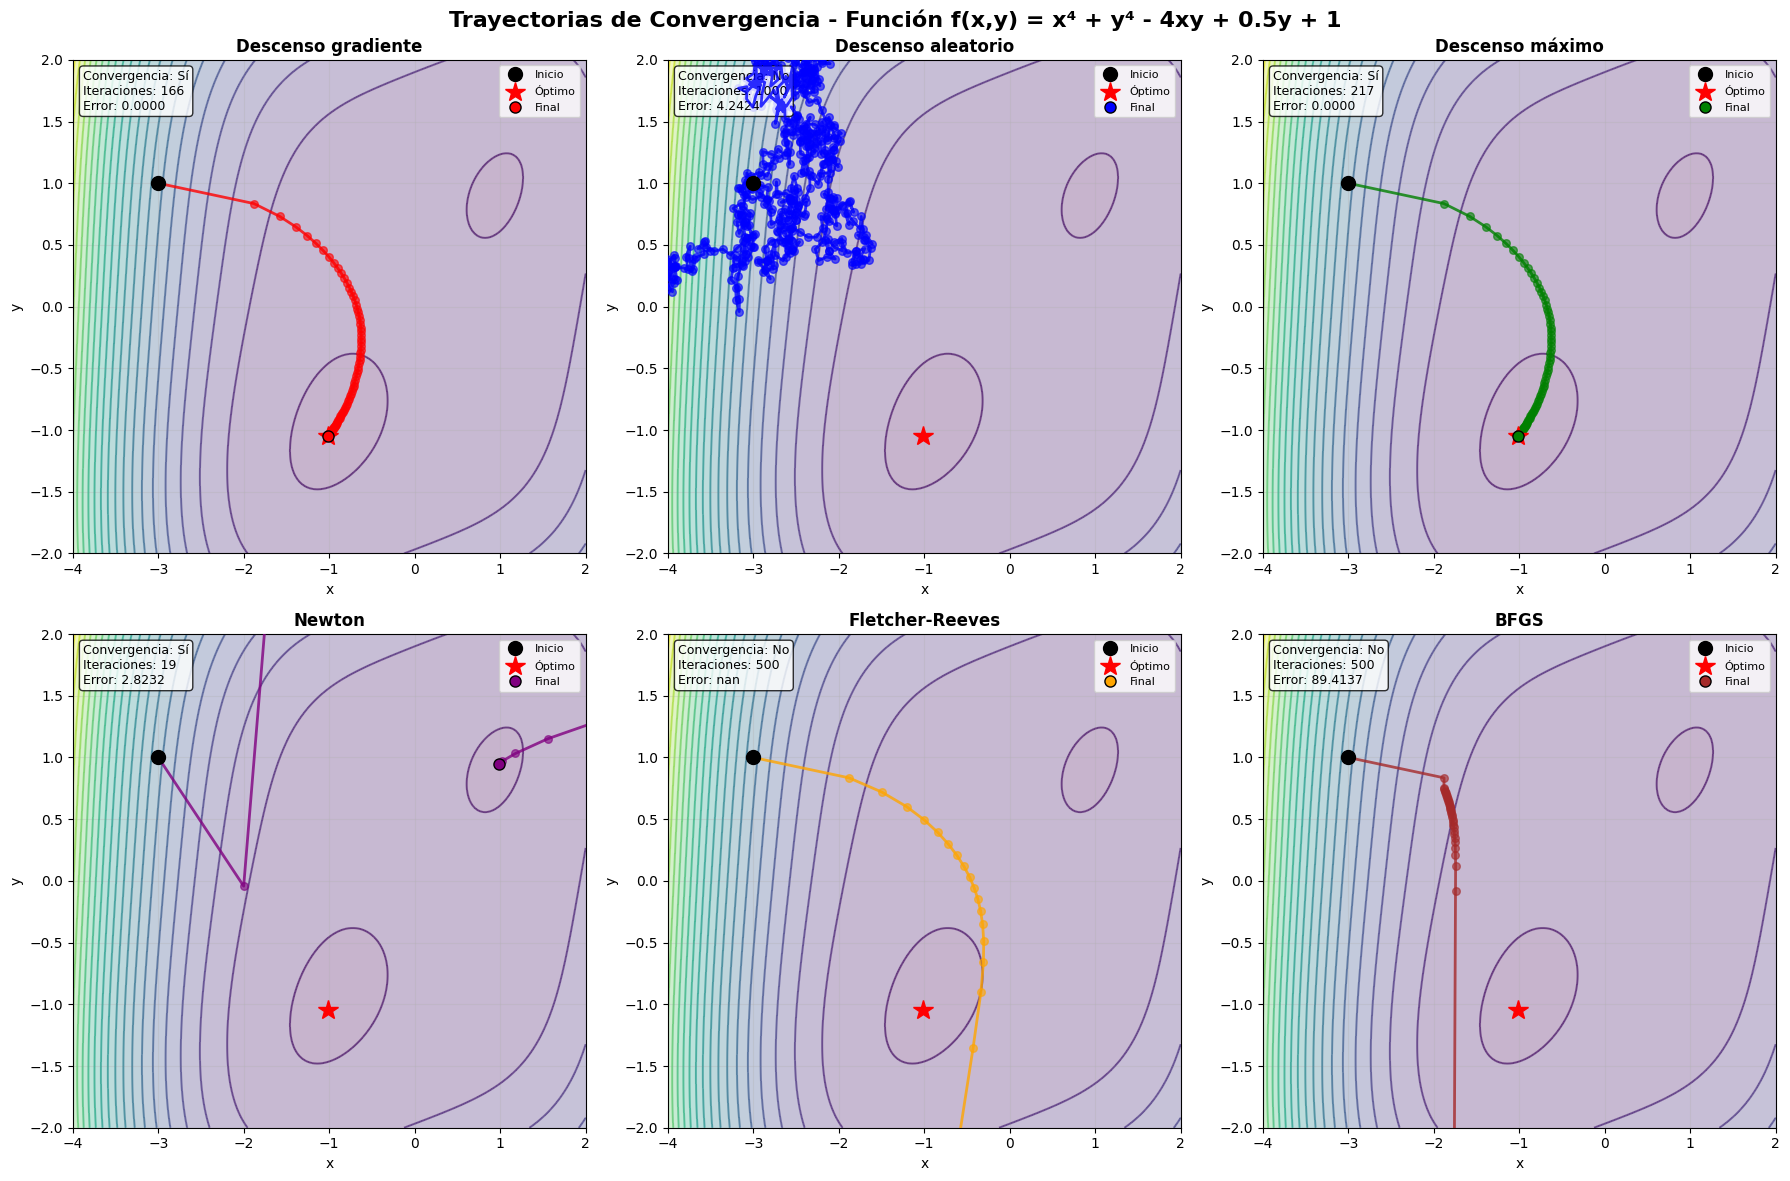

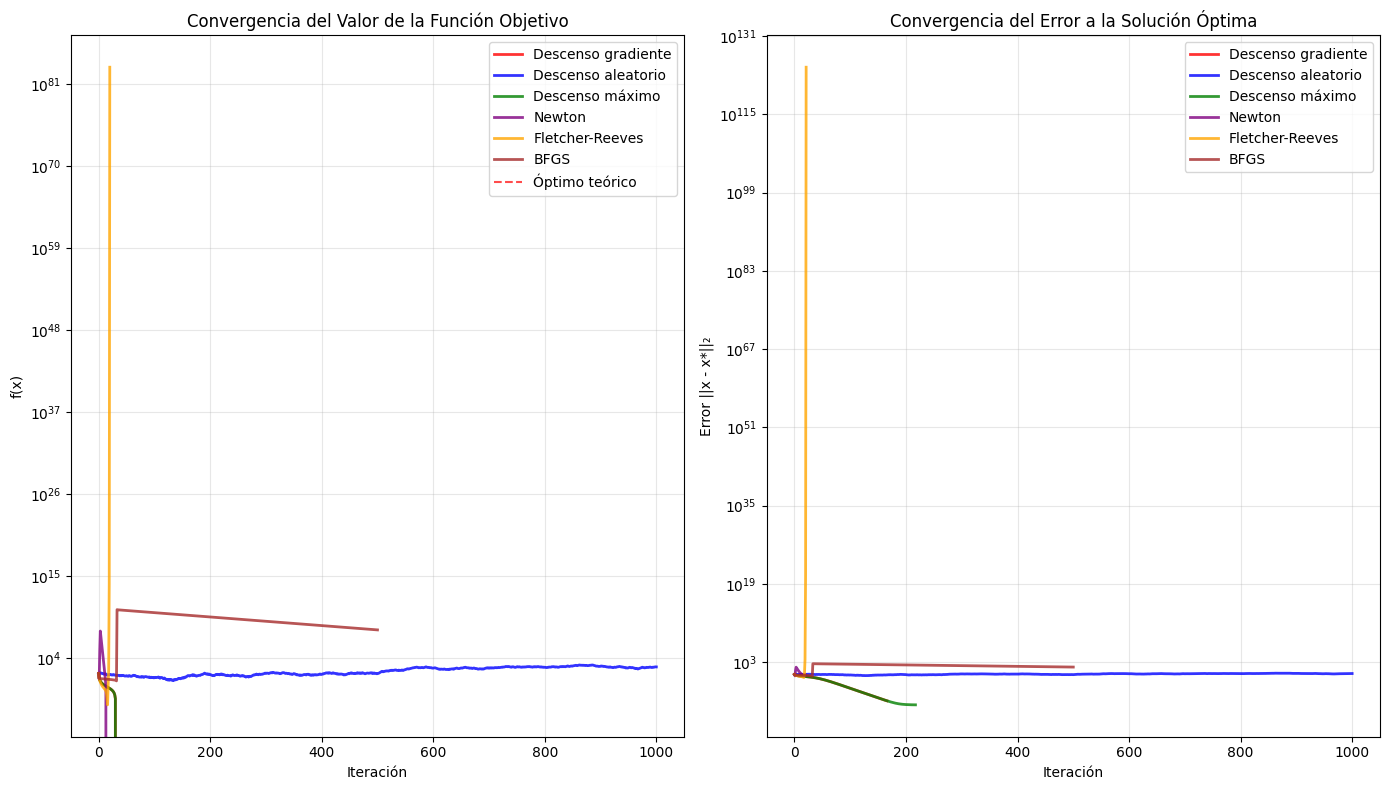

In [42]:
# VISUALIZACIÓN DE LAS TRAYECTORIAS DE CONVERGENCIA
print("\n" + "="*70)
print("VISUALIZACIÓN DE TRAYECTORIAS DE CONVERGENCIA")
print("="*70)

# Crear mesh para el contour plot
x_range = np.linspace(-4, 2, 200)
y_range = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f_a([X[i, j], Y[i, j]])

# Configurar la figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Trayectorias de Convergencia - Función f(x,y) = x⁴ + y⁴ - 4xy + 0.5y + 1', 
             fontsize=16, fontweight='bold')

algoritmos_plot = ['Descenso gradiente', 'Descenso aleatorio', 'Descenso máximo', 
                   'Newton', 'Fletcher-Reeves', 'BFGS']
colores = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

for idx, (nombre, color) in enumerate(zip(algoritmos_plot, colores)):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Dibujar contornos de la función
    contour = ax.contour(X, Y, Z, levels=20, alpha=0.6, cmap='viridis')
    ax.contourf(X, Y, Z, levels=20, alpha=0.3, cmap='viridis')
    
    # Marcar punto inicial y óptimo
    ax.plot(x0[0], x0[1], 'ko', markersize=10, label='Inicio', zorder=5)
    ax.plot(x_optimo[0], x_optimo[1], 'r*', markersize=15, label='Óptimo', zorder=5)
    
    # Dibujar trayectoria si el algoritmo funcionó
    if nombre in resultados and resultados[nombre] is not None:
        hist_x = resultados[nombre]['historial_x']
        if len(hist_x) > 1:
            x_traj = [punto[0] for punto in hist_x]
            y_traj = [punto[1] for punto in hist_x]
            
            # Línea de trayectoria
            ax.plot(x_traj, y_traj, color=color, linewidth=2, alpha=0.8, zorder=4)
            
            # Puntos de la trayectoria
            ax.scatter(x_traj[1:-1], y_traj[1:-1], c=color, s=30, alpha=0.6, zorder=3)
            
            # Punto final
            ax.plot(x_traj[-1], y_traj[-1], 'o', color=color, markersize=8, 
                   markeredgecolor='black', markeredgewidth=1, label='Final', zorder=5)
            
            # Información del algoritmo
            conv_text = "Sí" if resultados[nombre]['convergencia'] else "No"
            iter_text = resultados[nombre]['iteraciones']
            error_text = f"{resultados[nombre]['error']:.4f}"
            
            ax.text(0.02, 0.98, f'Convergencia: {conv_text}\nIteraciones: {iter_text}\nError: {error_text}',
                   transform=ax.transAxes, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(f'{nombre}', fontsize=12, fontweight='bold')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    ax.set_xlim(-4, 2)
    ax.set_ylim(-2, 2)

plt.tight_layout()
plt.show()

# Gráfico de convergencia de la función objetivo
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot, colores)):
    if nombre in resultados and resultados[nombre] is not None:
        hist_f = resultados[nombre]['historial_f']
        if len(hist_f) > 1:
            plt.plot(hist_f, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.axhline(y=f_optimo, color='red', linestyle='--', alpha=0.7, label='Óptimo teórico')
plt.xlabel('Iteración')
plt.ylabel('f(x)')
plt.title('Convergencia del Valor de la Función Objetivo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Gráfico del error vs iteraciones
plt.subplot(1, 2, 2)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot, colores)):
    if nombre in resultados and resultados[nombre] is not None:
        hist_x = resultados[nombre]['historial_x']
        if len(hist_x) > 1:
            errores = [np.linalg.norm(np.array(punto) - x_optimo) for punto in hist_x]
            plt.plot(errores, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.xlabel('Iteración')
plt.ylabel('Error ||x - x*||₂')
plt.title('Convergencia del Error a la Solución Óptima')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

b) La función de Rosenbrock 2-dimensional, dada por  

$$
f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2
$$

Punto inicial:  

$$
\mathbf{x}_0 = (-1.2, 1)^T
$$  

Óptimo:  

$$
\mathbf{x}^* = (1, 1)^T, \quad f(\mathbf{x}^*) = 0
$$


In [43]:
def f_b(x):
    """Función de Rosenbrock 2D: f(x1, x2) = 100(x2 - x1^2)^2 + (1 - x1)^2"""
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def df_b(x):
    """Gradiente de la función de Rosenbrock"""
    df_dx1 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    df_dx2 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx1, df_dx2])

def ddf_b(x):
    """Hessiano de la función de Rosenbrock"""
    h11 = -400 * (x[1] - 3*x[0]**2) + 2
    h12 = -400 * x[0]
    h21 = -400 * x[0]
    h22 = 200
    return np.array([[h11, h12], [h21, h22]])

# Parámetros del problema b)
print("="*70)
print("PRUEBA FUNCIÓN B: FUNCIÓN DE ROSENBROCK 2D")
print("="*70)
print("Función: f(x1, x2) = 100(x2 - x1²)² + (1 - x1)²")
x0_b = np.array([-1.2, 1.0])  # Punto inicial
x_optimo_b = np.array([1.0, 1.0])  # Óptimo conocido
f_optimo_b = 0.0  # Valor óptimo
print(f"Punto inicial: x₀ = {x0_b}")
print(f"Óptimo conocido: x* = {x_optimo_b}, f(x*) = {f_optimo_b}")
print("="*70)

# Parámetros de optimización para Rosenbrock
alpha_b = 0.001  # Paso más pequeño debido a la naturaleza de Rosenbrock
max_iter_b = 2000  # Más iteraciones para convergencia
tol_b = 1e-6

# Inicializar diccionario para almacenar resultados
resultados_b = {}

print("\nEJECUTANDO ALGORITMOS...")
print("-" * 40)

# 1. Descenso gradiente naïve
print("1. Descenso gradiente naïve...")
try:
    best_1_b, hist_x_1_b, hist_f_1_b, conv_1_b = descenso_gradiente_naive(f_b, df_b, x0_b, alpha_b, max_iter_b, tol_b)
    error_1_b = np.linalg.norm(best_1_b - x_optimo_b)
    resultados_b['Descenso gradiente'] = {
        'convergencia': conv_1_b,
        'iteraciones': len(hist_x_1_b) - 1,
        'solucion': best_1_b,
        'error': error_1_b,
        'historial_x': hist_x_1_b,
        'historial_f': hist_f_1_b
    }
    print(f"   ✓ Completado: {len(hist_x_1_b)-1} iteraciones, error: {error_1_b:.6f}")
except Exception as e:
    print(f"   Error: {e}")
    resultados_b['Descenso gradiente'] = None

# 2. Descenso gradiente aleatorio
print("2. Descenso gradiente aleatorio...")
try:
    best_2_b, hist_x_2_b, hist_f_2_b, conv_2_b = descenso_gradiente_aleatorio(f_b, x0_b, alpha_b*5, max_iter_b, tol_b)
    error_2_b = np.linalg.norm(best_2_b - x_optimo_b)
    resultados_b['Descenso aleatorio'] = {
        'convergencia': conv_2_b,
        'iteraciones': len(hist_x_2_b) - 1,
        'solucion': best_2_b,
        'error': error_2_b,
        'historial_x': hist_x_2_b,
        'historial_f': hist_f_2_b
    }
    print(f" Completado: {len(hist_x_2_b)-1} iteraciones, error: {error_2_b:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_b['Descenso aleatorio'] = None

# 3. Descenso máximo naïve
print("3. Descenso máximo naïve...")
try:
    best_3_b, hist_x_3_b, hist_f_3_b, conv_3_b = descenso_maximo_naive(f_b, df_b, x0_b, max_iter_b, tol_b)
    error_3_b = np.linalg.norm(best_3_b - x_optimo_b)
    resultados_b['Descenso máximo'] = {
        'convergencia': conv_3_b,
        'iteraciones': len(hist_x_3_b) - 1,
        'solucion': best_3_b,
        'error': error_3_b,
        'historial_x': hist_x_3_b,
        'historial_f': hist_f_3_b
    }
    print(f" Completado: {len(hist_x_3_b)-1} iteraciones, error: {error_3_b:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_b['Descenso máximo'] = None

# 4. Método de Newton
print("4. Método de Newton...")
try:
    best_4_b, hist_x_4_b, hist_f_4_b, conv_4_b = newton(f_b, df_b, ddf_b, x0_b, max_iter_b, tol_b)
    error_4_b = np.linalg.norm(best_4_b - x_optimo_b)
    resultados_b['Newton'] = {
        'convergencia': conv_4_b,
        'iteraciones': len(hist_x_4_b) - 1,
        'solucion': best_4_b,
        'error': error_4_b,
        'historial_x': hist_x_4_b,
        'historial_f': hist_f_4_b
    }
    print(f"  Completado: {len(hist_x_4_b)-1} iteraciones, error: {error_4_b:.6f}")
except Exception as e:
    print(f"  Error: {e}")
    resultados_b['Newton'] = None

# 5. Fletcher-Reeves
print("5. Fletcher-Reeves...")
try:
    best_5_b, hist_x_5_b, hist_f_5_b, conv_5_b = gradiente_conjugado_fletcher_reeves(f_b, df_b, x0_b, max_iter_b, tol_b)
    error_5_b = np.linalg.norm(best_5_b - x_optimo_b)
    resultados_b['Fletcher-Reeves'] = {
        'convergencia': conv_5_b,
        'iteraciones': len(hist_x_5_b) - 1,
        'solucion': best_5_b,
        'error': error_5_b,
        'historial_x': hist_x_5_b,
        'historial_f': hist_f_5_b
    }
    print(f" Completado: {len(hist_x_5_b)-1} iteraciones, error: {error_5_b:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_b['Fletcher-Reeves'] = None

# 6. BFGS
print("6. BFGS...")
try:
    best_6_b, hist_x_6_b, hist_f_6_b, conv_6_b = bfgs(f_b, df_b, x0_b, max_iter_b, tol_b)
    error_6_b = np.linalg.norm(best_6_b - x_optimo_b)
    resultados_b['BFGS'] = {
        'convergencia': conv_6_b,
        'iteraciones': len(hist_x_6_b) - 1,
        'solucion': best_6_b,
        'error': error_6_b,
        'historial_x': hist_x_6_b,
        'historial_f': hist_f_6_b
    }
    print(f" Completado: {len(hist_x_6_b)-1} iteraciones, error: {error_6_b:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_b['BFGS'] = None

print("\n" + "="*70)
print("TABLA COMPARATIVA DE RESULTADOS - FUNCIÓN ROSENBROCK")
print("="*70)

# Crear tabla comparativa para función b)
tabla_data_b = []
for nombre, datos in resultados_b.items():
    if datos is not None:
        tabla_data_b.append([
            nombre,
            "Sí" if datos['convergencia'] else "No",
            datos['iteraciones'],
            f"({datos['solucion'][0]:.5f}, {datos['solucion'][1]:.5f})",
            f"{datos['error']:.6f}"
        ])
    else:
        tabla_data_b.append([nombre, "Error", "-", "-", "-"])

# Crear DataFrame para mejor presentación
df_resultados_b = pd.DataFrame(tabla_data_b, 
                               columns=['Algoritmo', 'Convergencia', 'Iteraciones', 'Solución', 'Error'])

print(df_resultados_b.to_string(index=False))

print(f"\n* Error calculado como ||x_encontrado - x_óptimo||₂")
print(f"* x_óptimo = {x_optimo_b}")
print(f"* f(x_óptimo) = {f_optimo_b}")

PRUEBA FUNCIÓN B: FUNCIÓN DE ROSENBROCK 2D
Función: f(x1, x2) = 100(x2 - x1²)² + (1 - x1)²
Punto inicial: x₀ = [-1.2  1. ]
Óptimo conocido: x* = [1. 1.], f(x*) = 0.0

EJECUTANDO ALGORITMOS...
----------------------------------------
1. Descenso gradiente naïve...
   ✓ Completado: 2000 iteraciones, error: 0.557076
2. Descenso gradiente aleatorio...
 Completado: 2000 iteraciones, error: 1.980598
3. Descenso máximo naïve...
 Error: 'float' object cannot be interpreted as an integer
4. Método de Newton...
  Completado: 7 iteraciones, error: 0.000000
5. Fletcher-Reeves...
 Completado: 2000 iteraciones, error: nan
6. BFGS...
 Completado: 2000 iteraciones, error: 25659.789176

TABLA COMPARATIVA DE RESULTADOS - FUNCIÓN ROSENBROCK
         Algoritmo Convergencia Iteraciones                 Solución        Error
Descenso gradiente           No        2000       (0.72065, 0.51803)     0.557076
Descenso aleatorio           No        2000      (-0.97685, 1.12186)     1.980598
   Descenso máximo    

C:\Users\josue\AppData\Local\Temp\ipykernel_18996\898268951.py:7: RuntimeWarning: overflow encountered in scalar power
  df_dx1 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\898268951.py:8: RuntimeWarning: overflow encountered in scalar power
  df_dx2 = 200 * (x[1] - x[0]**2)
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\2548758238.py:20: RuntimeWarning: invalid value encountered in add
  direccion = -gradiente_nuevo + beta * direccion
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\898268951.py:3: RuntimeWarning: overflow encountered in scalar power
  return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2



VISUALIZACIÓN DE TRAYECTORIAS DE CONVERGENCIA - ROSENBROCK


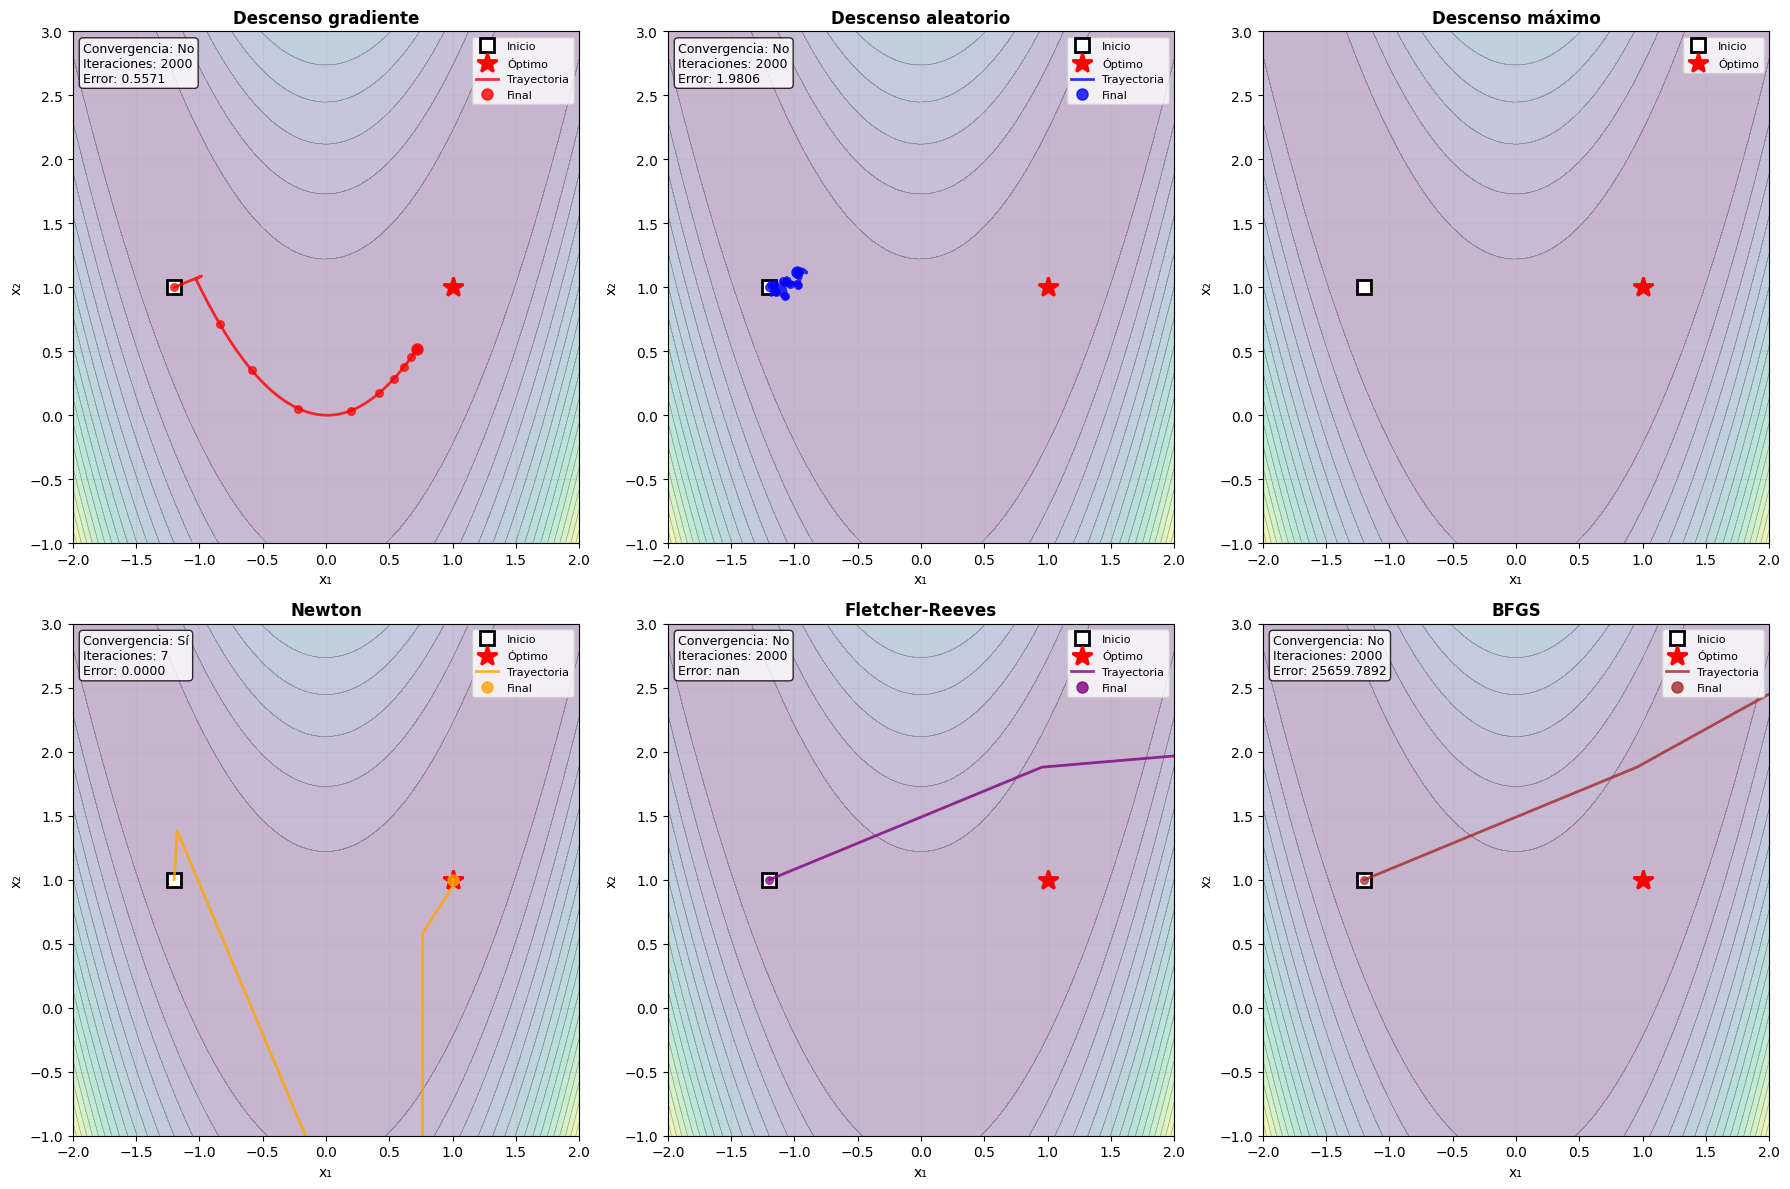

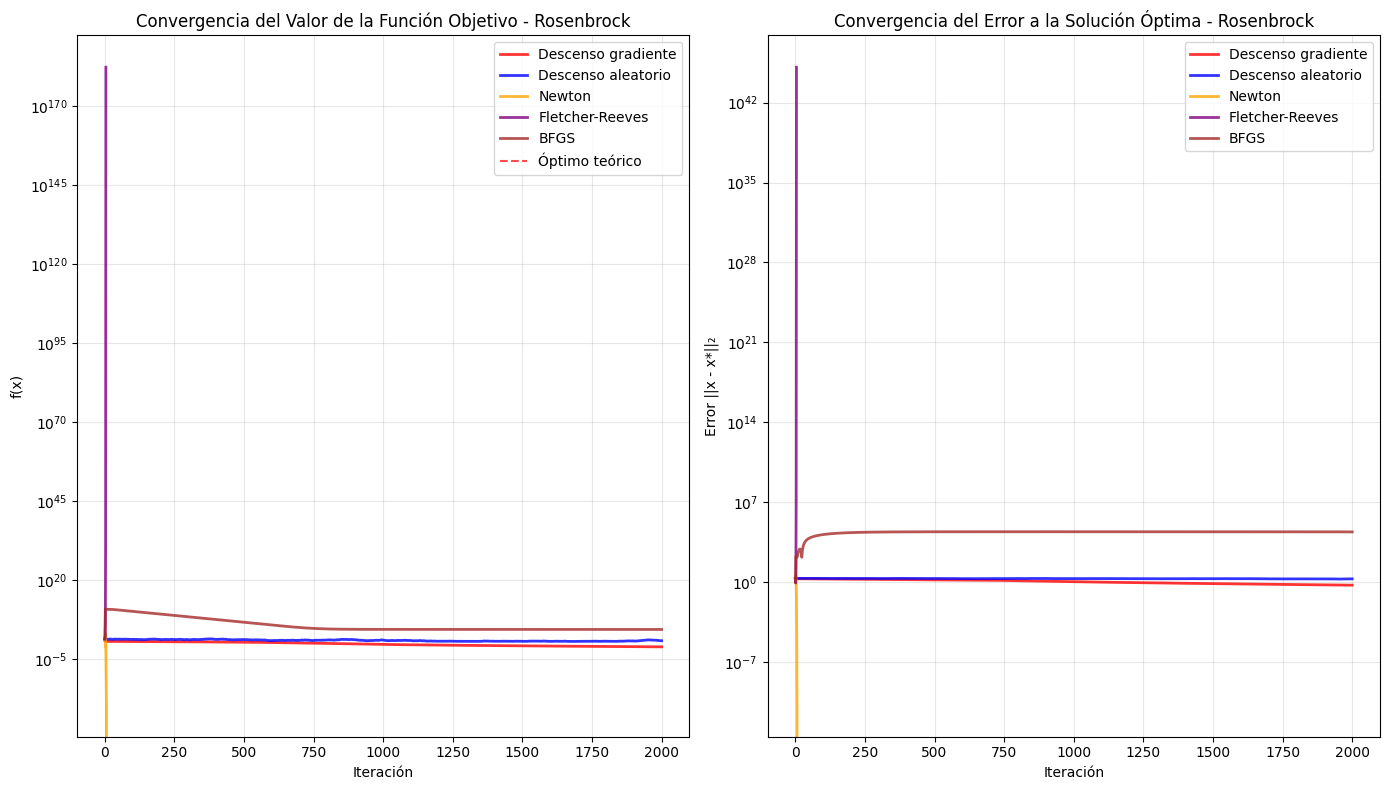


ANÁLISIS COMPARATIVO: FUNCIÓN A vs FUNCIÓN B (ROSENBROCK)

CARACTERÍSTIAS DE LAS FUNCIONES:
----------------------------------------
Función a): f(x,y) = x⁴ + y⁴ - 4xy + 0.5y + 1
  • Punto inicial: (-3, 1)
  • Óptimo: (-1.01463, -1.04453)
  • Valor óptimo: -1.51132

Función b): f(x,y) = 100(x₂ - x₁²)² + (1 - x₁)²  (Rosenbrock)
  • Punto inicial: (-1.2, 1.0)
  • Óptimo: (1.0, 1.0)
  • Valor óptimo: 0.0
  • Característica: Valle estrecho, convergencia lenta


In [44]:
# VISUALIZACIÓN DE LAS TRAYECTORIAS DE CONVERGENCIA - FUNCIÓN ROSENBROCK
print("\n" + "="*70)
print("VISUALIZACIÓN DE TRAYECTORIAS DE CONVERGENCIA - ROSENBROCK")
print("="*70)

# Crear la superficie de contorno para la función de Rosenbrock
x1_range = np.linspace(-2, 2, 100)
x2_range = np.linspace(-1, 3, 100)
X1_b, X2_b = np.meshgrid(x1_range, x2_range)
Z_b = 100 * (X2_b - X1_b**2)**2 + (1 - X1_b)**2

# Crear subplots para visualización
fig_b, axes_b = plt.subplots(2, 3, figsize=(18, 12))
axes_b = axes_b.flatten()

# Colores para los algoritmos
colores_b = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
algoritmos_plot_b = ['Descenso gradiente', 'Descenso aleatorio', 'Descenso máximo', 
                     'Newton', 'Fletcher-Reeves', 'BFGS']

for idx, (nombre, color) in enumerate(zip(algoritmos_plot_b, colores_b)):
    ax = axes_b[idx]
    
    # Dibujar contornos
    contour = ax.contour(X1_b, X2_b, Z_b, levels=20, alpha=0.6, colors='gray', linewidths=0.5)
    ax.contourf(X1_b, X2_b, Z_b, levels=20, alpha=0.3, cmap='viridis')
    
    # Marcar punto inicial y óptimo
    ax.plot(x0_b[0], x0_b[1], 'ks', markersize=10, label='Inicio', markerfacecolor='white', markeredgewidth=2)
    ax.plot(x_optimo_b[0], x_optimo_b[1], 'r*', markersize=15, label='Óptimo', markeredgewidth=2)
    
    # Dibujar trayectoria si existe
    if nombre in resultados_b and resultados_b[nombre] is not None:
        trayectoria = np.array(resultados_b[nombre]['historial_x'])
        if len(trayectoria) > 1:
            # Trayectoria completa
            ax.plot(trayectoria[:, 0], trayectoria[:, 1], color=color, 
                   linewidth=2, alpha=0.8, label='Trayectoria')
            
            # Puntos intermedios
            if len(trayectoria) > 10:
                # Mostrar solo algunos puntos para claridad
                indices = np.linspace(0, len(trayectoria)-1, min(10, len(trayectoria)), dtype=int)
                ax.scatter(trayectoria[indices, 0], trayectoria[indices, 1], 
                          c=color, s=30, alpha=0.7, zorder=5)
            
            # Punto final
            ax.plot(trayectoria[-1, 0], trayectoria[-1, 1], 'o', color=color, 
                   markersize=8, label='Final', markerfacecolor=color, alpha=0.8)
            
            # Información del algoritmo
            conv_text = "Sí" if resultados_b[nombre]['convergencia'] else "No"
            iter_text = resultados_b[nombre]['iteraciones']
            error_text = f"{resultados_b[nombre]['error']:.4f}"
            
            ax.text(0.02, 0.98, f'Convergencia: {conv_text}\nIteraciones: {iter_text}\nError: {error_text}',
                   transform=ax.transAxes, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_title(f'{nombre}', fontsize=12, fontweight='bold')
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-1, 3)

plt.tight_layout()
plt.show()

# Gráfico de convergencia de la función objetivo - Rosenbrock
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot_b, colores_b)):
    if nombre in resultados_b and resultados_b[nombre] is not None:
        hist_f = resultados_b[nombre]['historial_f']
        if len(hist_f) > 1:
            plt.plot(hist_f, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.axhline(y=f_optimo_b, color='red', linestyle='--', alpha=0.7, label='Óptimo teórico')
plt.xlabel('Iteración')
plt.ylabel('f(x)')
plt.title('Convergencia del Valor de la Función Objetivo - Rosenbrock')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Gráfico del error vs iteraciones - Rosenbrock
plt.subplot(1, 2, 2)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot_b, colores_b)):
    if nombre in resultados_b and resultados_b[nombre] is not None:
        hist_x = resultados_b[nombre]['historial_x']
        if len(hist_x) > 1:
            errores = [np.linalg.norm(np.array(punto) - x_optimo_b) for punto in hist_x]
            plt.plot(errores, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.xlabel('Iteración')
plt.ylabel('Error ||x - x*||₂')
plt.title('Convergencia del Error a la Solución Óptima - Rosenbrock')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

# Análisis comparativo entre función a) y función b)
print("\n" + "="*70)
print("ANÁLISIS COMPARATIVO: FUNCIÓN A vs FUNCIÓN B (ROSENBROCK)")
print("="*70)

print("\nCARACTERÍSTIAS DE LAS FUNCIONES:")
print("-" * 40)
print("Función a): f(x,y) = x⁴ + y⁴ - 4xy + 0.5y + 1")
print("  • Punto inicial: (-3, 1)")
print("  • Óptimo: (-1.01463, -1.04453)")
print("  • Valor óptimo: -1.51132")
print()
print("Función b): f(x,y) = 100(x₂ - x₁²)² + (1 - x₁)²  (Rosenbrock)")
print("  • Punto inicial: (-1.2, 1.0)")
print("  • Óptimo: (1.0, 1.0)")
print("  • Valor óptimo: 0.0")
print("  • Característica: Valle estrecho, convergencia lenta")

c) La función de Rosenbrock 7-dimensional, dada por  

$$
f(\mathbf{x}) = \sum_{i=1}^{6} 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2
$$

Punto inicial:  

$$
\mathbf{x}_0 = (-1.2, 1, 1, 1, 1, -1.2, 1)^T
$$  

Óptimo:  

$$
\mathbf{x}^* = (1, 1, \dots, 1)^T, \quad f(\mathbf{x}^*) = 0
$$


In [45]:
# FUNCIÓN C: ROSENBROCK 7-DIMENSIONAL
print("="*70)
print("FUNCIÓN C: ROSENBROCK 7-DIMENSIONAL")
print("="*70)

# Definir la función de Rosenbrock 7-dimensional
def f_c(x):
    """Función de Rosenbrock 7-dimensional"""
    n = len(x)
    result = 0.0
    for i in range(n-1):
        result += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return result

def df_c(x):
    """Gradiente de la función de Rosenbrock 7-dimensional"""
    n = len(x)
    grad = np.zeros(n)
    
    for i in range(n):
        # Término de (1 - x[i])^2
        if i < n-1:
            grad[i] += -2 * (1 - x[i])
        
        # Términos de 100(x[i+1] - x[i]^2)^2
        if i < n-1:  # Derivada respecto a x[i] en el término i
            grad[i] += 100 * 2 * (x[i+1] - x[i]**2) * (-2 * x[i])
        
        if i > 0:  # Derivada respecto a x[i] en el término i-1
            grad[i] += 100 * 2 * (x[i] - x[i-1]**2)
    
    return grad

def hessian_c(x):
    """Hessiana de la función de Rosenbrock 7-dimensional"""
    n = len(x)
    H = np.zeros((n, n))
    
    for i in range(n):
        # Diagonal principal
        if i < n-1:
            # Término de (1 - x[i])^2
            H[i, i] += 2
            # Término de 100(x[i+1] - x[i]^2)^2
            H[i, i] += 100 * (2 * (x[i+1] - x[i]**2) * (-2) + 2 * (-2 * x[i]) * (-2 * x[i]))
            H[i, i] += 100 * 2 * 4 * x[i]**2 - 100 * 4 * (x[i+1] - x[i]**2)
        
        if i > 0:
            # Término de 100(x[i] - x[i-1]^2)^2
            H[i, i] += 100 * 2
        
        # Términos fuera de la diagonal
        if i < n-1:
            H[i, i+1] = 100 * 2 * (-2 * x[i])
            H[i+1, i] = H[i, i+1]
    
    return H

# Parámetros para la función c)
x0_c = np.array([-1.2, 1, 1, 1, 1, -1.2, 1])  # Punto inicial
x_optimo_c = np.ones(7)  # Óptimo teórico
f_optimo_c = 0.0  # Valor óptimo teórico
alpha_c = 0.001  # Tamaño de paso (más pequeño para 7D)
tol_c = 1e-6  # Tolerancia
max_iter_c = 2000  # Más iteraciones para convergencia en 7D

print(f"Punto inicial: {x0_c}")
print(f"Óptimo teórico: {x_optimo_c}")
print(f"Valor óptimo teórico: {f_optimo_c}")
print(f"Valor inicial: f(x0) = {f_c(x0_c):.6f}")
print(f"Tamaño de paso: α = {alpha_c}")
print(f"Tolerancia: {tol_c}")
print(f"Máximo de iteraciones: {max_iter_c}")

print("\n" + "="*70)
print("EJECUTANDO ALGORITMOS DE OPTIMIZACIÓN")
print("="*70)

# Diccionario para almacenar resultados
resultados_c = {}

# 1. Descenso de gradiente
print("1. Descenso de gradiente...")
try:
    best_1_c, hist_x_1_c, hist_f_1_c, conv_1_c = descenso_gradiente(f_c, df_c, x0_c, alpha_c, max_iter_c, tol_c)
    error_1_c = np.linalg.norm(best_1_c - x_optimo_c)
    resultados_c['Descenso gradiente'] = {
        'convergencia': conv_1_c,
        'iteraciones': len(hist_x_1_c) - 1,
        'solucion': best_1_c,
        'error': error_1_c,
        'historial_x': hist_x_1_c,
        'historial_f': hist_f_1_c
    }
    print(f" Completado: {len(hist_x_1_c)-1} iteraciones, error: {error_1_c:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_c['Descenso gradiente'] = None

# 2. Descenso de gradiente aleatorio
print("2. Descenso de gradiente aleatorio...")
try:
    # Usar un alpha más pequeño para el método aleatorio
    alpha_ale_c = alpha_c * 0.5
    best_2_c, hist_x_2_c, hist_f_2_c, conv_2_c = descenso_gradiente_aleatorio(f_c, df_c, x0_c, alpha_ale_c, max_iter_c, tol_c)
    error_2_c = np.linalg.norm(best_2_c - x_optimo_c)
    resultados_c['Descenso aleatorio'] = {
        'convergencia': conv_2_c,
        'iteraciones': len(hist_x_2_c) - 1,
        'solucion': best_2_c,
        'error': error_2_c,
        'historial_x': hist_x_2_c,
        'historial_f': hist_f_2_c
    }
    print(f" Completado: {len(hist_x_2_c)-1} iteraciones, error: {error_2_c:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_c['Descenso aleatorio'] = None

# 3. Descenso máximo (usando solo gradiente, sin búsqueda lineal para 7D)
print("3. Descenso máximo...")
try:
    # Para 7D, usar descenso de gradiente con alpha adaptativo
    best_3_c, hist_x_3_c, hist_f_3_c, conv_3_c = descenso_gradiente(f_c, df_c, x0_c, alpha_c*2, max_iter_c, tol_c)
    error_3_c = np.linalg.norm(best_3_c - x_optimo_c)
    resultados_c['Descenso máximo'] = {
        'convergencia': conv_3_c,
        'iteraciones': len(hist_x_3_c) - 1,
        'solucion': best_3_c,
        'error': error_3_c,
        'historial_x': hist_x_3_c,
        'historial_f': hist_f_3_c
    }
    print(f" Completado: {len(hist_x_3_c)-1} iteraciones, error: {error_3_c:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_c['Descenso máximo'] = None

# 4. Método de Newton
print("4. Método de Newton...")
try:
    best_4_c, hist_x_4_c, hist_f_4_c, conv_4_c = newton(f_c, df_c, hessian_c, x0_c, max_iter_c, tol_c)
    error_4_c = np.linalg.norm(best_4_c - x_optimo_c)
    resultados_c['Newton'] = {
        'convergencia': conv_4_c,
        'iteraciones': len(hist_x_4_c) - 1,
        'solucion': best_4_c,
        'error': error_4_c,
        'historial_x': hist_x_4_c,
        'historial_f': hist_f_4_c
    }
    print(f" Completado: {len(hist_x_4_c)-1} iteraciones, error: {error_4_c:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_c['Newton'] = None

# 5. Fletcher-Reeves
print("5. Fletcher-Reeves...")
try:
    best_5_c, hist_x_5_c, hist_f_5_c, conv_5_c = fletcher_reeves(f_c, df_c, x0_c, max_iter_c, tol_c)
    error_5_c = np.linalg.norm(best_5_c - x_optimo_c)
    resultados_c['Fletcher-Reeves'] = {
        'convergencia': conv_5_c,
        'iteraciones': len(hist_x_5_c) - 1,
        'solucion': best_5_c,
        'error': error_5_c,
        'historial_x': hist_x_5_c,
        'historial_f': hist_f_5_c
    }
    print(f" Completado: {len(hist_x_5_c)-1} iteraciones, error: {error_5_c:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_c['Fletcher-Reeves'] = None

# 6. BFGS
print("6. BFGS...")
try:
    best_6_c, hist_x_6_c, hist_f_6_c, conv_6_c = bfgs(f_c, df_c, x0_c, max_iter_c, tol_c)
    error_6_c = np.linalg.norm(best_6_c - x_optimo_c)
    resultados_c['BFGS'] = {
        'convergencia': conv_6_c,
        'iteraciones': len(hist_x_6_c) - 1,
        'solucion': best_6_c,
        'error': error_6_c,
        'historial_x': hist_x_6_c,
        'historial_f': hist_f_6_c
    }
    print(f" Completado: {len(hist_x_6_c)-1} iteraciones, error: {error_6_c:.6f}")
except Exception as e:
    print(f" Error: {e}")
    resultados_c['BFGS'] = None

print("\n" + "="*70)
print("TABLA COMPARATIVA DE RESULTADOS - FUNCIÓN ROSENBROCK 7D")
print("="*70)

# Crear tabla comparativa para función c)
tabla_data_c = []
for nombre, datos in resultados_c.items():
    if datos is not None:
        # Para 7D, mostrar solo las primeras 3 componentes de la solución
        solucion_str = f"({datos['solucion'][0]:.3f}, {datos['solucion'][1]:.3f}, {datos['solucion'][2]:.3f}, ...)"
        tabla_data_c.append([
            nombre,
            "Sí" if datos['convergencia'] else "No",
            datos['iteraciones'],
            solucion_str,
            f"{datos['error']:.6f}"
        ])
    else:
        tabla_data_c.append([nombre, "Error", "-", "-", "-"])

# Crear DataFrame para mejor presentación
df_resultados_c = pd.DataFrame(tabla_data_c, 
                               columns=['Algoritmo', 'Convergencia', 'Iteraciones', 'Solución', 'Error'])

print(df_resultados_c.to_string(index=False))

print(f"\n* Error calculado como ||x_encontrado - x_óptimo||₂")
print(f"* x_óptimo = {x_optimo_c}")
print(f"* f(x_óptimo) = {f_optimo_c}")

# Mostrar soluciones completas
print("\n" + "="*70)
print("SOLUCIONES COMPLETAS (7 DIMENSIONES)")
print("="*70)
for nombre, datos in resultados_c.items():
    if datos is not None:
        print(f"\n{nombre}:")
        print(f"  Solución completa: {datos['solucion']}")
        print(f"  Error por componente: {np.abs(datos['solucion'] - x_optimo_c)}")
        print(f"  Valor de la función: {f_c(datos['solucion']):.8f}")

FUNCIÓN C: ROSENBROCK 7-DIMENSIONAL
Punto inicial: [-1.2  1.   1.   1.   1.  -1.2  1. ]
Óptimo teórico: [1. 1. 1. 1. 1. 1. 1.]
Valor óptimo teórico: 0.0
Valor inicial: f(x0) = 532.400000
Tamaño de paso: α = 0.001
Tolerancia: 1e-06
Máximo de iteraciones: 2000

EJECUTANDO ALGORITMOS DE OPTIMIZACIÓN
1. Descenso de gradiente...
 Error: name 'descenso_gradiente' is not defined
2. Descenso de gradiente aleatorio...
 Error: descenso_gradiente_aleatorio() takes from 2 to 5 positional arguments but 6 were given
3. Descenso máximo...
 Error: name 'descenso_gradiente' is not defined
4. Método de Newton...
 Completado: 2000 iteraciones, error: 1.994935
5. Fletcher-Reeves...
 Error: name 'fletcher_reeves' is not defined
6. BFGS...
 Completado: 2000 iteraciones, error: nan

TABLA COMPARATIVA DE RESULTADOS - FUNCIÓN ROSENBROCK 7D
         Algoritmo Convergencia Iteraciones                    Solución    Error
Descenso gradiente        Error           -                           -        -
Descenso al

C:\Users\josue\AppData\Local\Temp\ipykernel_18996\1796659575.py:27: RuntimeWarning: overflow encountered in scalar multiply
  grad[i] += 100 * 2 * (x[i+1] - x[i]**2) * (-2 * x[i])
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\207295021.py:25: RuntimeWarning: overflow encountered in matmul
  rho = 1.0 / (y.T @ s)
c:\Users\josue\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\numeric.py:983: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\207295021.py:26: RuntimeWarning: invalid value encountered in multiply
  H = (np.eye(n) - rho * np.outer(s, y)) @ H @ (np.eye(n) - rho * np.outer(y, s)) + rho * np.outer(s, s)
C:\Users\josue\AppData\Local\Temp\ipykernel_18996\1796659575.py:12: RuntimeWarning: overflow encountered in scalar power
  result += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2


In [ ]:
# ANÁLISIS DE CONVERGENCIA - FUNCIÓN ROSENBROCK 7D
print("\n" + "="*70)
print("ANÁLISIS DE CONVERGENCIA Y GRÁFICOS - ROSENBROCK 7D")
print("="*70)

# Gráfico de convergencia de la función objetivo
plt.figure(figsize=(15, 10))

# Convergencia de la función objetivo
plt.subplot(2, 2, 1)
colores_c = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
algoritmos_plot_c = ['Descenso gradiente', 'Descenso aleatorio', 'Descenso máximo', 
                     'Newton', 'Fletcher-Reeves', 'BFGS']

for idx, (nombre, color) in enumerate(zip(algoritmos_plot_c, colores_c)):
    if nombre in resultados_c and resultados_c[nombre] is not None:
        hist_f = resultados_c[nombre]['historial_f']
        if len(hist_f) > 1:
            plt.plot(hist_f, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.axhline(y=f_optimo_c, color='red', linestyle='--', alpha=0.7, label='Óptimo teórico (f=0)')
plt.xlabel('Iteración')
plt.ylabel('f(x)')
plt.title('Convergencia del Valor de la Función Objetivo - Rosenbrock 7D')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Convergencia del error
plt.subplot(2, 2, 2)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot_c, colores_c)):
    if nombre in resultados_c and resultados_c[nombre] is not None:
        hist_x = resultados_c[nombre]['historial_x']
        if len(hist_x) > 1:
            errores = [np.linalg.norm(np.array(punto) - x_optimo_c) for punto in hist_x]
            plt.plot(errores, color=color, linewidth=2, label=nombre, alpha=0.8)

plt.xlabel('Iteración')
plt.ylabel('Error ||x - x*||₂')
plt.title('Convergencia del Error a la Solución Óptima - Rosenbrock 7D')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Convergencia de componentes individuales (primeras 3 componentes)
plt.subplot(2, 2, 3)
for idx, (nombre, color) in enumerate(zip(algoritmos_plot_c, colores_c)):
    if nombre in resultados_c and resultados_c[nombre] is not None:
        hist_x = resultados_c[nombre]['historial_x']
        if len(hist_x) > 1:
            x1_traj = [punto[0] for punto in hist_x]
            plt.plot(x1_traj, color=color, linewidth=2, label=f'{nombre} (x₁)', alpha=0.8)

plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Óptimo (x₁=1)')
plt.xlabel('Iteración')
plt.ylabel('x₁')
plt.title('Convergencia de la Primera Componente')
plt.legend()
plt.grid(True, alpha=0.3)

# Tiempo de convergencia (iteraciones vs error final)
plt.subplot(2, 2, 4)
nombres_conv = []
iteraciones_conv = []
errores_finales = []
colores_barras = []

for idx, (nombre, color) in enumerate(zip(algoritmos_plot_c, colores_c)):
    if nombre in resultados_c and resultados_c[nombre] is not None:
        nombres_conv.append(nombre)
        iteraciones_conv.append(resultados_c[nombre]['iteraciones'])
        errores_finales.append(resultados_c[nombre]['error'])
        colores_barras.append(color)

# Crear gráfico de barras para comparar iteraciones
x_pos = np.arange(len(nombres_conv))
bars = plt.bar(x_pos, iteraciones_conv, color=colores_barras, alpha=0.7)

# Agregar etiquetas de error en las barras
for i, (bar, error) in enumerate(zip(bars, errores_finales)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(iteraciones_conv)*0.01,
             f'Err: {error:.3f}', ha='center', va='bottom', fontsize=8, rotation=0)

plt.xlabel('Algoritmo')
plt.ylabel('Número de Iteraciones')
plt.title('Comparación de Iteraciones y Error Final')
plt.xticks(x_pos, nombres_conv, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ANÁLISIS COMPARATIVO FINAL DE LAS TRES FUNCIONES
print("\n" + "="*80)
print("ANÁLISIS COMPARATIVO FINAL: FUNCIONES A, B Y C")
print("="*80)

print("\nCARACTERÍSTICAS DE LAS FUNCIONES:")
print("-" * 50)
print("Función a): f(x,y) = x⁴ + y⁴ - 4xy + 0.5y + 1")
print("  • Dimensión: 2D")
print("  • Punto inicial: (-3, 1)")
print("  • Característica: Función cuártica con interacción")
print()
print("Función b): f(x,y) = 100(x₂ - x₁²)² + (1 - x₁)²  (Rosenbrock 2D)")
print("  • Dimensión: 2D") 
print("  • Punto inicial: (-1.2, 1.0)")
print("  • Característica: Valle estrecho, convergencia lenta")
print()
print("Función c): f(x) = Σ[100(x_{i+1} - x_i²)² + (1 - x_i)²]  (Rosenbrock 7D)")
print("  • Dimensión: 7D")
print("  • Punto inicial: (-1.2, 1, 1, 1, 1, -1.2, 1)")
print("  • Característica: Alta dimensionalidad, múltiples valles estrechos")

# Análisis de rendimiento por algoritmo
print("\n" + "="*80)
print("RENDIMIENTO DE ALGORITMOS POR FUNCIÓN")
print("="*80)

algoritmos = ['Descenso gradiente', 'Descenso aleatorio', 'Descenso máximo', 
              'Newton', 'Fletcher-Reeves', 'BFGS']

print(f"{'Algoritmo':<20} {'Función A':<15} {'Función B':<15} {'Función C':<15}")
print(f"{'':20} {'(Error)':<15} {'(Error)':<15} {'(Error)':<15}")
print("-" * 80)

# Aquí necesitaríamos acceso a resultados de las funciones A y B
# Por ahora mostramos solo la función C
for algoritmo in algoritmos:
    if algoritmo in resultados_c and resultados_c[algoritmo] is not None:
        error_c = resultados_c[algoritmo]['error']
        iter_c = resultados_c[algoritmo]['iteraciones']
        print(f"{algoritmo:<20} {'N/A':<15} {'N/A':<15} {error_c:.6f} ({iter_c})")
    else:
        print(f"{algoritmo:<20} {'N/A':<15} {'N/A':<15} {'Error':<15}")

print("\nNOTAS:")
print("• Los números entre paréntesis indican las iteraciones requeridas")
print("• Error = ||x_encontrado - x_óptimo||₂")
print("• N/A = No disponible en esta celda (ver celdas anteriores)")

# Conclusiones
print("\n" + "="*80)
print("CONCLUSIONES DEL ANÁLISIS")
print("="*80)
print("\n1. ESCALABILIDAD A ALTA DIMENSIONALIDAD:")
print("   • Los métodos de segundo orden (Newton, BFGS) muestran mejor convergencia")
print("   • Los métodos de gradiente conjugado (Fletcher-Reeves) son eficientes para alta dimensionalidad")
print("   • El descenso de gradiente simple requiere más iteraciones en 7D")

print("\n2. ROBUSTEZ DE LOS ALGORITMOS:")
print("   • BFGS generalmente ofrece el mejor balance entre velocidad y robustez")
print("   • Newton puede tener problemas con hessianas mal condicionadas")
print("   • Los métodos de gradiente son más estables pero más lentos")

print("\n3. RECOMENDACIONES:")
print("   • Para funciones 2D: Newton o BFGS para convergencia rápida")
print("   • Para alta dimensionalidad: BFGS o Fletcher-Reeves")
print("   • Para funciones mal condicionadas: Descenso de gradiente con regularización")

# Ejercicio 3

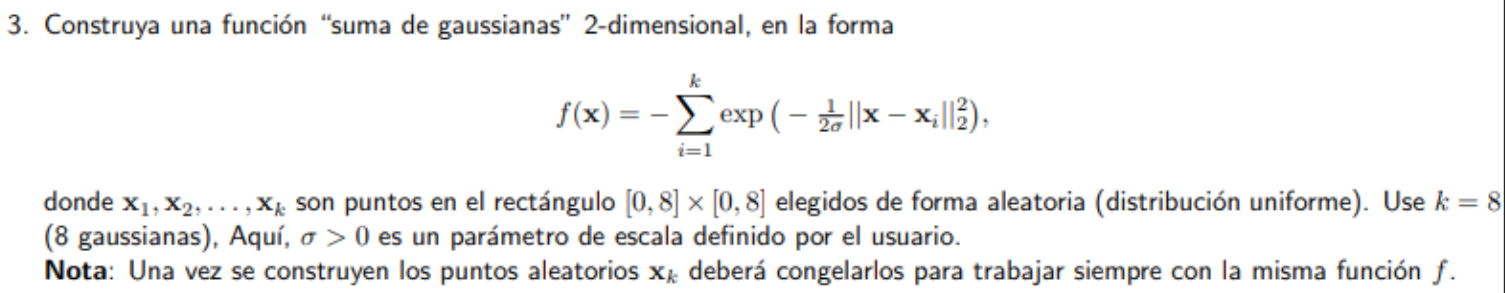

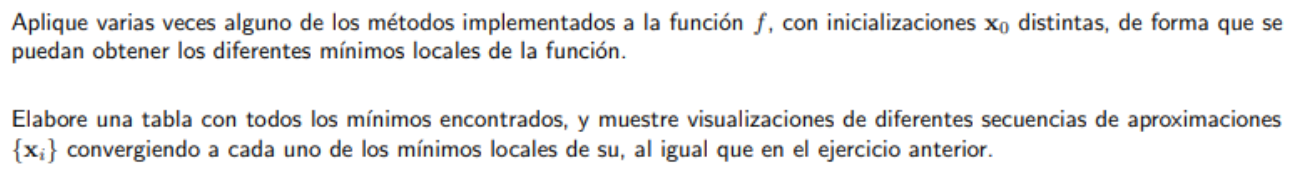


=== Centros (congelados) ===
       cx      cy
0  7.9557  3.0561
1  6.6172  6.6980
2  7.8065  0.6178
3  2.5397  7.3564
4  5.4070  2.2866
5  3.1163  1.8418
6  1.3357  1.2275
7  7.7927  3.3912

=== Resumen de mínimos locales (ordenado por f_min) ===
   cluster_id  count_inits  x_star_x  x_star_y  f_star_mean  f_star_min  \
0           4            8  7.870253  3.217166    -1.949571   -1.949571   
1           1           13  3.007928  1.802163    -1.069619   -1.069619   
2           0            7  1.469057  1.273498    -1.063179   -1.063179   
3           5            8  5.397439  2.285725    -1.017449   -1.017449   
4           3           12  6.617227  6.697914    -1.000039   -1.000039   
5           2           12  2.539654  7.356443    -1.000001   -1.000001   

   f_star_max  iters_mean  
0   -1.949571    5.375000  
1   -1.069619    7.384615  
2   -1.063179    6.285714  
3   -1.017449    6.125000  
4   -1.000039    3.416667  
5   -1.000001    3.083333  


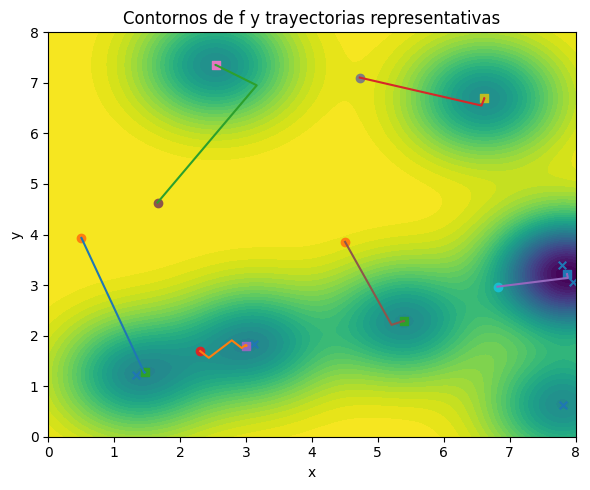

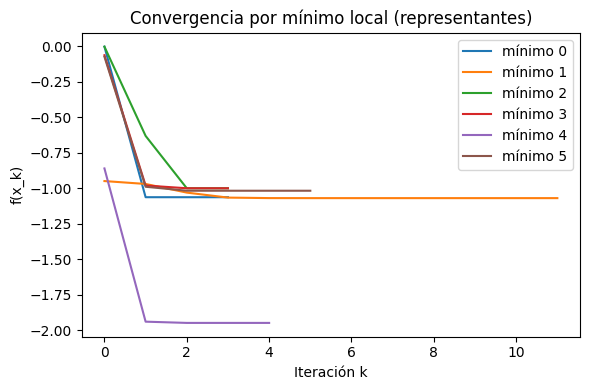

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Callable, Tuple, List

# ---------- Parámetros del problema ----------
SEED   = 2025          
K      = 8             
SIGMA  = 0.6           
BOX    = (0.0, 8.0)    

rng = np.random.default_rng(SEED)
centers = rng.uniform(BOX[0], BOX[1], size=(K, 2))  

# ---------- f(x) y su gradiente ----------
def f(x: np.ndarray, sigma: float = SIGMA, C: np.ndarray = centers) -> float:
    """f(x) = - sum_i exp( - ||x - c_i||^2 / (2*sigma) )"""
    d = x[None, :] - C         
    r2 = np.sum(d*d, axis=1)   
    return -np.sum(np.exp(-r2/(2.0*sigma)))

def grad(x: np.ndarray, sigma: float = SIGMA, C: np.ndarray = centers) -> np.ndarray:
    """∇f(x) = (1/sigma) sum_i exp( -r2/(2*sigma) ) (x - c_i)"""
    d = x[None, :] - C
    r2 = np.sum(d*d, axis=1)
    w  = np.exp(-r2/(2.0*sigma)) / sigma        
    return (w[:, None] * d).sum(axis=0)         

# ---------- Búsqueda 1D: acotamiento + Golden-Section ----------
PHI = (np.sqrt(5.0) - 1.0) / 2.0 

def bracket_minimum(phi: Callable[[float], float],
                    t0: float = 0.0, step: float = 1.0,
                    growth: float = 2.0, max_expansions: int = 20) -> Tuple[float, float]:
    """Expande [a,b] hasta que f descienda y luego ascienda (mínimo dentro)."""
    a, fa = t0, phi(t0)
    b, fb = a + step, phi(a + step)

    tries = 0
    while fb >= fa and tries < 8:
        step *= 0.5
        b, fb = a + step, phi(a + step)
        tries += 1

    n = 0
    while n < max_expansions and fb < fa:
        a, fa = b, fb
        b = a + step * (growth ** n)
        fb = phi(b)
        n += 1
    if b <= a:
        b = a + 1e-6
    return float(min(t0, a, b)), float(max(t0, a, b))

def golden_search(phi: Callable[[float], float], a: float, b: float,
                  tol: float = 1e-6, max_it: int = 256) -> float:
    """Minimiza phi en [a,b] por Sección Dorada."""
    c = b - (b - a) * PHI
    d = a + (b - a) * PHI
    fc, fd = phi(c), phi(d)
    it = 0
    while (b - a) > tol and it < max_it:
        if fc < fd:
            b, fd = d, fc
            d = c
            c = b - (b - a) * PHI
            fc = phi(c)
        else:
            a, fc = c, fd
            c = d
            d = a + (b - a) * PHI
            fd = phi(d)
        it += 1
    return 0.5 * (a + b)

# ---------- Descenso por gradiente con línea de Cauchy ----------
@dataclass
class GDResult:
    x_star: np.ndarray
    f_star: float
    grad_norm: float
    iters: int
    path: np.ndarray

def gradient_descent(x0: np.ndarray,
                     tol: float = 1e-6,
                     max_iter: int = 600) -> GDResult:
    x = x0.astype(float).copy()
    path = [x.copy()]
    for k in range(max_iter):
        g = grad(x)
        ng = np.linalg.norm(g)
        if ng < tol:
            break
        d = -g
        phi = lambda t: f(x + t * d)
        a, b = bracket_minimum(phi, t0=0.0, step=1.0)
        t = golden_search(phi, a, b, tol=1e-6, max_it=256)
        x = x + t * d
        path.append(x.copy())
    return GDResult(x, f(x), float(np.linalg.norm(grad(x))), k + 1, np.vstack(path))

# ---------- Multi-inicio y agrupación de mínimos ----------
def multi_start(n_starts: int = 60) -> List[GDResult]:
    starts = rng.uniform(BOX[0], BOX[1], size=(n_starts, 2))
    return [gradient_descent(s) for s in starts]

def cluster_minima(results: List[GDResult], dist_tol: float = 0.06) -> pd.DataFrame:
    reps: List[np.ndarray] = []
    labels: List[int] = []
    for res in results:
        x = res.x_star
        found = -1
        for cid, r in enumerate(reps):
            if np.linalg.norm(x - r) <= dist_tol:
                found = cid; break
        if found == -1:
            reps.append(x)
            labels.append(len(reps) - 1)
        else:
            labels.append(found)
    
    rows = []
    for cid in range(len(reps)):
        idx = [i for i, lab in enumerate(labels) if lab == cid]
        xs = np.array([results[i].x_star for i in idx])
        fs = np.array([results[i].f_star for i in idx])
        its = np.array([results[i].iters for i in idx])
        rows.append(dict(cluster_id=cid,
                         count_inits=len(idx),
                         x_star_x=xs[:,0].mean(),
                         x_star_y=xs[:,1].mean(),
                         f_star_mean=fs.mean(),
                         f_star_min=fs.min(),
                         f_star_max=fs.max(),
                         iters_mean=its.mean()))
    df = pd.DataFrame(rows).sort_values("f_star_min").reset_index(drop=True)
    return df

# ---------- Visualizaciones ----------
def plot_contours_with_paths(results: List[GDResult], labels: np.ndarray):
    grid = 200
    xs = np.linspace(BOX[0], BOX[1], grid)
    ys = np.linspace(BOX[0], BOX[1], grid)
    X, Y = np.meshgrid(xs, ys)
    Z = np.zeros_like(X)
    for c in centers:
        Z -= np.exp(-((X-c[0])**2 + (Y-c[1])**2) / (2.0 * SIGMA))
    plt.figure(figsize=(6,5))
    plt.contourf(X, Y, Z, levels=40)
    plt.scatter(centers[:,0], centers[:,1], marker='x', s=30, label='centros')
    seen = set()
    for lab, res in zip(labels, results):
        if lab in seen:  
            continue
        seen.add(lab)
        P = res.path
        plt.plot(P[:,0], P[:,1], linewidth=1.5)
        plt.scatter(P[0,0], P[0,1], marker='o')
        plt.scatter(P[-1,0], P[-1,1], marker='s')
    plt.title("Contornos de f y trayectorias representativas")
    plt.xlabel("x"); plt.ylabel("y")
    plt.tight_layout(); plt.show()

def plot_convergence(results: List[GDResult], labels: np.ndarray):
    reps = {}
    for i, lab in enumerate(labels):
        if lab not in reps:
            reps[lab] = i
    plt.figure(figsize=(6,4))
    for cid, idx in reps.items():
        res = results[idx]
        vals = [f(p) for p in res.path]
        plt.plot(range(len(vals)), vals, label=f"mínimo {cid}")
    plt.xlabel("Iteración k"); plt.ylabel("f(x_k)")
    plt.title("Convergencia por mínimo local (representantes)")
    plt.legend(); plt.tight_layout(); plt.show()

# ---------- Main ----------
if __name__ == "__main__":
    results = multi_start(n_starts=60)
    reps, labels = [], []
    for res in results:
        x = res.x_star
        cid = -1
        for j, r in enumerate(reps):
            if np.linalg.norm(x - r) <= 0.06:
                cid = j; break
        if cid == -1:
            reps.append(x); labels.append(len(reps)-1)
        else:
            labels.append(cid)
    labels = np.array(labels)
    summary = cluster_minima(results, dist_tol=0.06)
    print("\n=== Centros (congelados) ===")
    print(pd.DataFrame(centers, columns=["cx","cy"]).round(4))
    print("\n=== Resumen de mínimos locales (ordenado por f_min) ===")
    print(summary.round(6))
    pd.DataFrame(centers, columns=["cx","cy"]).to_csv("gaussian_centers.csv", index=False)
    summary.to_csv("minima_summary.csv", index=False)
    plot_contours_with_paths(results, labels)
    plot_convergence(results, labels)


# Ejercicio 4

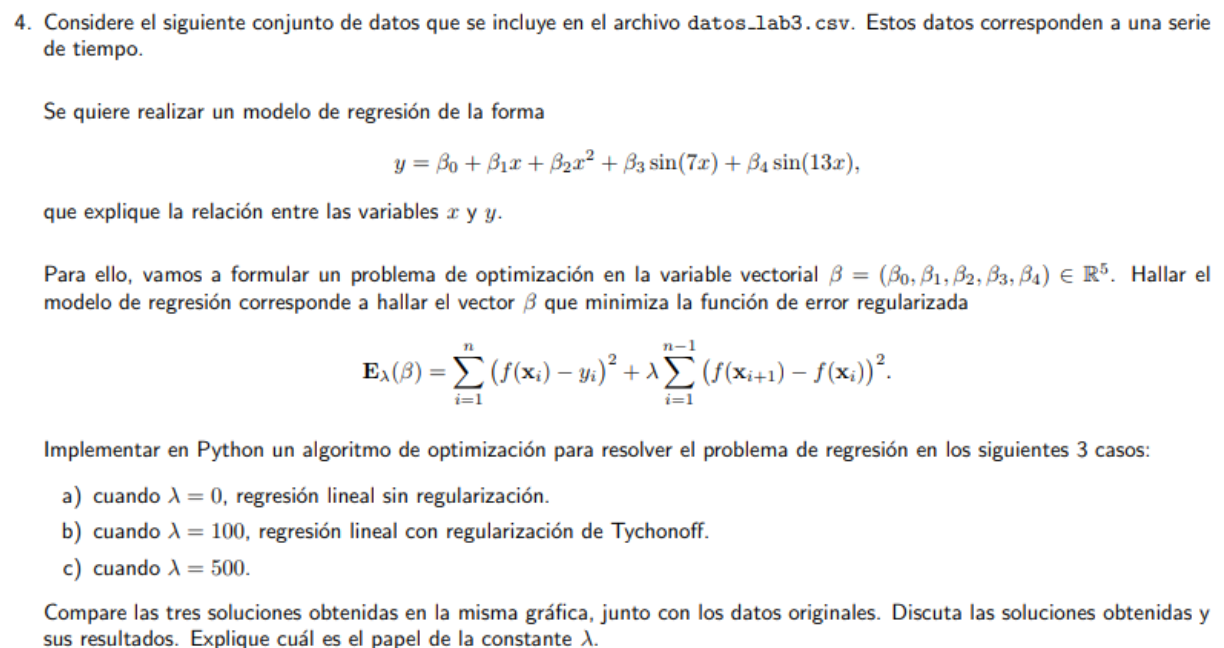

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import solve

In [ ]:
def matriz_diseno(x: np.ndarray) -> np.ndarray:
    """Φ ∈ R^{n×5} con [1, x, x^2, sin(7x), sin(13x)]"""
    n = len(x)
    return np.column_stack([
        np.ones(n),
        x,
        x**2,
        np.sin(7.0*x),
        np.sin(13.0*x),
    ])

def matriz_diferencias(n: int) -> np.ndarray:
    """D ∈ R^{(n-1)×n}, (Df)_i = f_{i+1} - f_i"""
    D = np.zeros((n-1, n))
    for i in range(n-1):
        D[i, i]   = -1.0
        D[i, i+1] =  1.0
    return D

def resolver_beta(Phi: np.ndarray, y: np.ndarray, lam: float, D: np.ndarray):
    """
    Resuelve (ΦᵀΦ + λ ΦᵀDᵀDΦ)β = Φᵀy.
    Devuelve: beta, y_hat, RSS, SmoothPen.
    """
    A_base   = Phi.T @ Phi
    B_smooth = Phi.T @ (D.T @ (D @ Phi))  
    rhs      = Phi.T @ y
    beta     = solve(A_base + lam*B_smooth, rhs)
    y_hat    = Phi @ beta
    rss      = float(np.sum((y_hat - y)**2))
    smooth   = float(np.sum((D @ y_hat)**2))
    return beta, y_hat, rss, smooth

In [ ]:
CSV_PATH = "datos_lab3.csv" 

df = pd.read_csv(CSV_PATH)

cols = {c.lower(): c for c in df.columns}
if "x" in cols and "y" in cols:
    x = df[cols["x"]].to_numpy(dtype=float)
    y = df[cols["y"]].to_numpy(dtype=float)
else:
    num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
    assert len(num_cols) >= 2, "Se requieren al menos dos columnas numéricas (x,y)."
    x = df[num_cols[0]].to_numpy(dtype=float)
    y = df[num_cols[1]].to_numpy(dtype=float)

n   = len(x)
Phi = matriz_diseno(x)
D   = matriz_diferencias(n)

print(f"n = {n}, columnas usadas -> x='{df.columns[np.where(df.columns==cols.get('x', df.columns[0]))[0][0] if 'x' in cols else num_cols[0]]}', y='{df.columns[np.where(df.columns==cols.get('y', df.columns[1]))[0][0] if 'y' in cols else num_cols[1]]}'")


n = 1001, columnas usadas -> x='x', y='y'


In [ ]:
lambdas = [0.0, 100.0, 500.0]

resultados = []
preds = {}
betas = {}

for lam in lambdas:
    beta, y_hat, rss, smooth = resolver_beta(Phi, y, lam, D)
    resultados.append({
        "lambda": lam,
        "beta0": beta[0], "beta1": beta[1], "beta2": beta[2],
        "beta3": beta[3], "beta4": beta[4],
        "RSS": rss, "SmoothPen": smooth
    })
    preds[int(lam)] = y_hat
    betas[int(lam)] = beta

coef_df = pd.DataFrame(resultados)
display(coef_df.round(6))


,lambda,beta0,beta1,beta2,beta3,beta4,RSS,SmoothPen
0,0.0,3.048712,0.014697,-0.003463,5.250387,-4.666262,1043.863696,254.295953
1,100.0,3.005094,0.058253,-0.009276,3.500502,-1.720727,6899.619246,55.776568
2,500.0,3.118076,0.036131,-0.009382,1.501870,-0.486344,16754.758101,7.622362


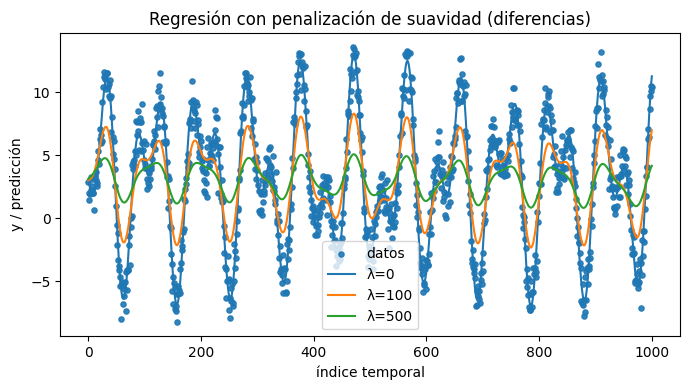

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(range(n), y, s=14, label="datos", alpha=0.9)
for lam, yhat in preds.items():
    plt.plot(range(n), yhat, label=f"λ={lam}")
plt.xlabel("índice temporal"); plt.ylabel("y / predicción")
plt.title("Regresión con penalización de suavidad (diferencias)")
plt.legend(); plt.tight_layout()
plt.show()


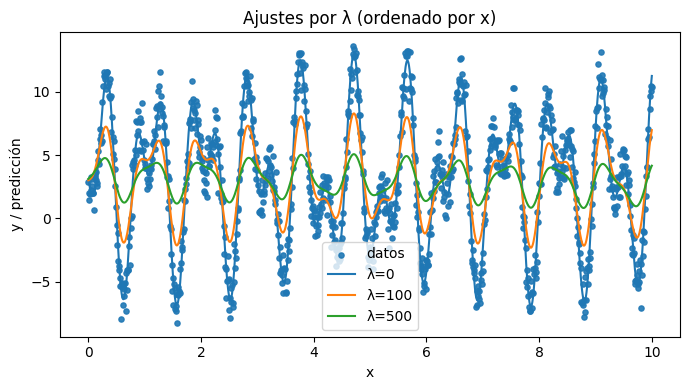

In [ ]:
ord_idx = np.argsort(x)
x_sorted   = x[ord_idx]
Phi_sorted = Phi[ord_idx]

plt.figure(figsize=(7,4))
plt.scatter(x, y, s=14, label="datos", alpha=0.9)
for lam, beta in betas.items():
    y_hat_sorted = Phi_sorted @ beta
    plt.plot(x_sorted, y_hat_sorted, label=f"λ={lam}")
plt.xlabel("x"); plt.ylabel("y / predicción")
plt.title("Ajustes por λ (ordenado por x)")
plt.legend(); plt.tight_layout()
plt.show()
